In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
#import dataset
df = pd.read_csv('loan_data.csv')
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


<h2>Exploratory data analysis</h2>

In [3]:
#check statistical properties of dataset
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [4]:
#view dimensions of dataset
print(df.shape)

(9578, 14)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<p>We can see that there are no null values in our dataset</p>

In [6]:
#check the values of every column
for column in df:
    unique_values = np.unique(df[column])
    nr_values = len(unique_values)
    if nr_values <= 10:
        print('The number of values for feature {} is: {} -- {}'.format(column, nr_values, unique_values))
    else:
        print('The number of values for feature {} is: {}'.format(column, nr_values))

The number of values for feature credit.policy is: 2 -- [0 1]
The number of values for feature purpose is: 7 -- ['all_other' 'credit_card' 'debt_consolidation' 'educational'
 'home_improvement' 'major_purchase' 'small_business']
The number of values for feature int.rate is: 249
The number of values for feature installment is: 4788
The number of values for feature log.annual.inc is: 1987
The number of values for feature dti is: 2529
The number of values for feature fico is: 44
The number of values for feature days.with.cr.line is: 2687
The number of values for feature revol.bal is: 7869
The number of values for feature revol.util is: 1035
The number of values for feature inq.last.6mths is: 28
The number of values for feature delinq.2yrs is: 11
The number of values for feature pub.rec is: 6 -- [0 1 2 3 4 5]
The number of values for feature not.fully.paid is: 2 -- [0 1]


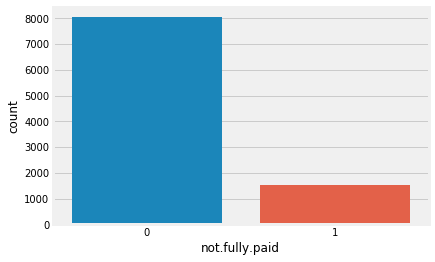

In [7]:
#check the distribution of not fully paid loans
sns.countplot(x='not.fully.paid', data=df)

Text(0.5, 1.0, 'FICO distribution on each credit policy')

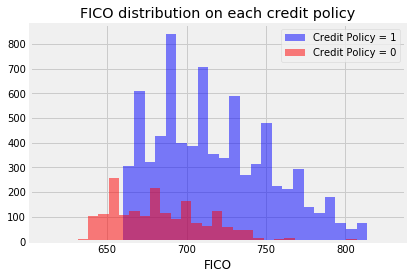

In [8]:
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Credit Policy = 1')
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Credit Policy = 0')

plt.legend()
plt.xlabel('FICO')
plt.title('FICO distribution on each credit policy')

<p>We can see that FICO scores are higher for those customers who meets the credit underwriting criteria of LendingClub.com</p>

Text(0.5, 1.0, 'FICO distribution on each payment condition')

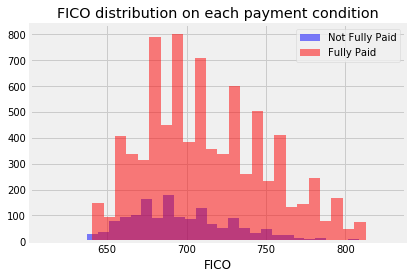

In [9]:
df[df['not.fully.paid'] == 1]['fico'].hist(alpha=0.5, color='blue', bins=30, label='Not Fully Paid')
df[df['not.fully.paid'] == 0]['fico'].hist(alpha=0.5, color='red', bins=30, label='Fully Paid')

plt.legend()
plt.xlabel('FICO')
plt.title('FICO distribution on each payment condition')

Text(0.5, 1.0, 'Count of loans by purpose')

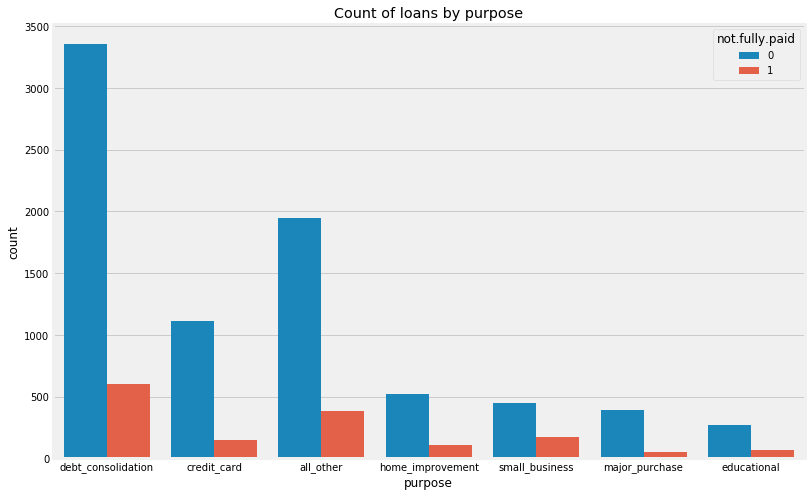

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(x='purpose', hue='not.fully.paid', data=df)
plt.title('Count of loans by purpose')

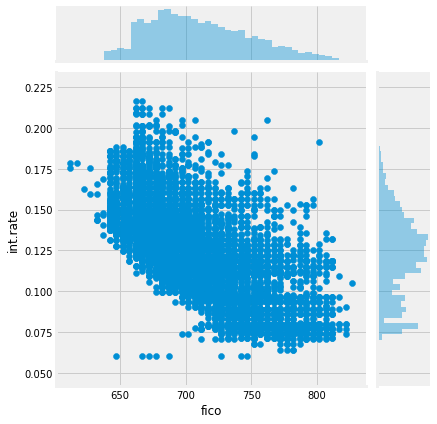

In [13]:
#see the trend between FICO score and interest rate
sns.jointplot(x='fico', y='int.rate', data=df, kind='scatter')

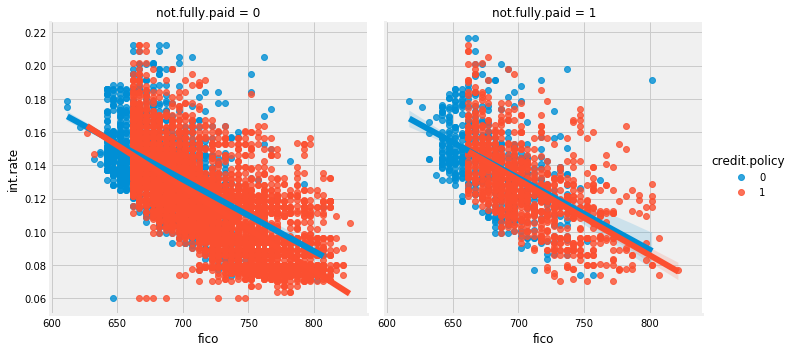

In [14]:
#see if the trend differed between not.fully.paid and credit.policy
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid')

In [16]:
#one-hot encoding categorical variable
df = pd.get_dummies(df, columns=['purpose'])

<h2>Modeling</h2>

In [18]:
#declare feature vectors and target variable
X = df.drop('not.fully.paid', axis=1)
y = df['not.fully.paid']

In [19]:
#split data into separate training and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(6704, 19)
(6704,)
(2874, 19)
(2874,)


In [20]:
#check percentage of Default in Train and Test set
percentage_notfullypaid_training = 100*y_train.sum()/len(y_train)
percentage_notfullypaid_testing  = 100*y_test.sum()/len(y_test)
                                                  
print("Percentage of NotFullyPaid in Training Set \t : {:0.2f}%.".format(percentage_notfullypaid_training))
print("Percentage of NotFullyPaid in Testing Set \t : {:0.2f}%.".format(percentage_notfullypaid_testing))

Percentage of NotFullyPaid in Training Set 	 : 16.01%.
Percentage of NotFullyPaid in Testing Set 	 : 16.01%.


<h4>a. Fitting an Optimal Single Decision Tree (by Depth)</h4>

<p>We fit here a single tree to our loan dataset and perform 10-fold cross validation on the training set. For each Depth of the tree, we fit a tree and then compute the 10-fold CV scores. These scores are then averaged and compared accross different depths</p>

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

mean_CV_acc = {}
all_CV_acc = {}
for i in range(3, 33, 3):
    model = DecisionTreeClassifier(max_depth=i)
    score = cross_val_score(estimator=model, X=x_train, y=y_train, cv=10, n_jobs=-1)
    all_CV_acc[i] = score
    mean_CV_acc[i] = score.mean()

In [23]:
#mean accuracy of each depth
mean_CV_acc

{3: 0.8392010143025559,
 6: 0.8321909824943836,
 9: 0.8190624374402204,
 12: 0.8017616833863469,
 15: 0.7771510554529886,
 18: 0.7596986008852904,
 21: 0.7500037813911071,
 24: 0.7458251217830372,
 27: 0.7425453210845919,
 30: 0.7391124852636964}

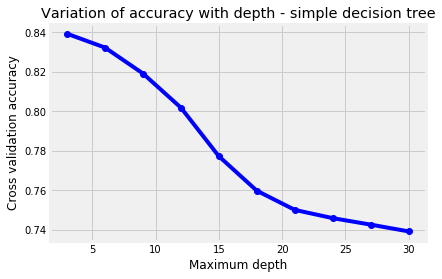

In [24]:
x = list(mean_CV_acc.keys())
y = list(mean_CV_acc.values())

plt.ylabel('Cross validation accuracy')
plt.xlabel('Maximum depth')
plt.title('Variation of accuracy with depth - simple decision tree')
plt.plot(x, y, 'b-', marker='o')
plt.show()

<p>As we can see, the optimal depth is found to be a depth of 3. We can get the Confidence Bands of these results by using scores.std() and plt.fill_between()</p>

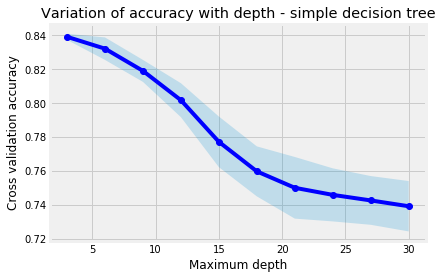

In [25]:
stds = np.array([np.std(score) for score in all_CV_acc.values()])

plt.fill_between(x, y+stds, y-stds, alpha=0.2)
plt.ylabel('Cross validation accuracy')
plt.xlabel('Maximum depth')
plt.title('Variation of accuracy with depth - simple decision tree')
plt.plot(x, y, 'b-', marker='o')
plt.show()

In [26]:
#evaluate the performance at the best depth
from sklearn.metrics import accuracy_score
best_depth = sorted(mean_CV_acc, key=mean_CV_acc.get, reverse=True)[0]

model_tree = DecisionTreeClassifier(max_depth=best_depth)
model_tree.fit(x_train, y_train)

acc_trees_training = accuracy_score(y_train, model_tree.predict(x_train))
acc_trees_testing = accuracy_score(y_test, model_tree.predict(x_test))

print("Simple Decision Trees: Accuracy, Training Set \t : {:.2%}".format(acc_trees_training))
print("Simple Decision Trees: Accuracy, Testing Set \t : {:.2%}".format(acc_trees_testing))

Simple Decision Trees: Accuracy, Training Set 	 : 84.02%
Simple Decision Trees: Accuracy, Testing Set 	 : 83.86%


Text(0.5, 18.5, 'Predicted label')

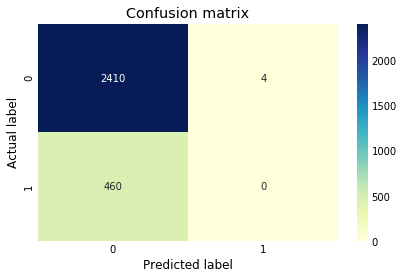

In [27]:
#get performance by class (lookup confusion matrix)
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_test, model_tree.predict(x_test))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h4>b. Bagging and Voting</h4>

In [35]:
#creating model
data_train = pd.concat([x_train, y_train], axis=1)
data_test = pd.concat([x_test, y_test], axis=1)
n_trees = 100
chosen_depth = 5
model = DecisionTreeClassifier(max_depth=chosen_depth)
predictions_train = np.zeros((data_train.shape[0], n_trees))
predictions_test = np.zeros((data_test.shape[0], n_trees))

#conduct bootstrap iterations
for i in range(n_trees):
    temp = data_train.sample(frac=1, replace=True)
    response_variable = temp['not.fully.paid']
    temp = temp.drop(['not.fully.paid'], axis=1)
    
    model.fit(temp, response_variable)
    predictions_train[:, i] = model.predict(x_train)
    predictions_test[:, i] = model.predict(x_test)

#make predictions dataframe
columns = ['Bootstrap-Model_'+str(i+1) for i in range(n_trees)]
predictions_train = pd.DataFrame(predictions_train, columns=columns)
predictions_test = pd.DataFrame(predictions_test, columns=columns)

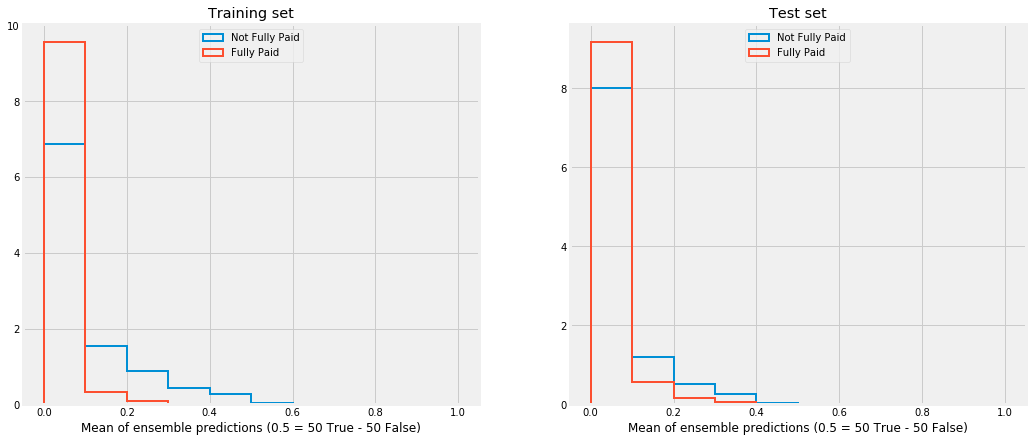

In [42]:
#plot the mean of ensemble predictions on each dataset
num_to_avg = 100
fig, axs = plt.subplots(1, 2, figsize=(16,7))
for (ax, label, predictions, y) in [(axs[0], 'Training set', predictions_train, y_train.values), (axs[1], 'Test set', predictions_test, y_test.values)]:
    mean_predictions = predictions.iloc[:, :num_to_avg].mean(axis=1)
    mean_predictions[y == 1].hist(density=True, histtype='step', range=[0,1], label='Not Fully Paid', lw=2, ax=ax)
    mean_predictions[y == 0].hist(density=True, histtype='step', range=[0,1], label='Fully Paid', lw=2, ax=ax)
    ax.legend(loc='upper center');
    ax.set_xlabel('Mean of ensemble predictions (0.5 = 50 True - 50 False)')
    ax.set_title(label)

In [47]:
#check accuracy of payment condition detection in Train and Test set
def get_prediction(data, count=-1):
    count = data.shape[1] if count==-1 else count
    temp = data.iloc[:, 0:count]
    return np.mean(temp, axis=1) > 0.5

acc_bagging_training = 100*accuracy_score(y_train, get_prediction(predictions_train, count=-1))
acc_bagging_testing = 100*accuracy_score(y_test, get_prediction(predictions_test, count=-1))

print("Bagging: Accuracy, Training Set\t: {:0.2f}%".format(acc_bagging_training))
print("Bagging: Accuracy, Testing Set\t: {:0.2f}%".format( acc_bagging_testing))

Bagging: Accuracy, Training Set	: 84.02%
Bagging: Accuracy, Testing Set	: 83.99%


Text(0.5, 18.5, 'Predicted label')

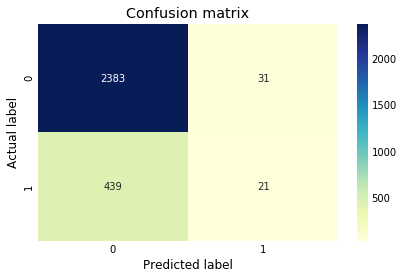

In [46]:
#performance evaluation using confusion matrix
cnf_matrix = confusion_matrix(y_test, model.predict(x_test))
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

<h4>c. Random Forest</h4>

In [49]:
#fit and evaluate a random forest model
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=int(x_train.shape[1]/2), max_depth=best_depth)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

acc_rf_training = accuracy_score(y_train, y_pred_train)*100
acc_rf_testing = accuracy_score(y_test, y_pred_test)*100

print("Random Forest: Accuracy, Training Set : {:0.2f}%".format(acc_rf_training))
print("Random Forest: Accuracy, Testing Set  : {:0.2f}%".format(acc_rf_testing))

Random Forest: Accuracy, Training Set : 83.99%
Random Forest: Accuracy, Testing Set  : 83.99%


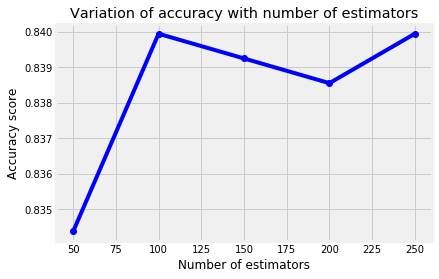

In [51]:
#modifying n_estimators parameter
trees, accs = [], []
for i in range(1, 6):
    tree = RandomForestClassifier(n_estimators=50*i).fit(x_train, y_train)
    acc = accuracy_score(y_test, tree.predict(x_test))
    trees.append(50*i)
    accs.append(acc)
plt.ylabel('Accuracy score')
plt.xlabel('Number of estimators')
plt.title('Variation of accuracy with number of estimators')
plt.plot(trees, accs, 'b-', marker='o')
plt.show()

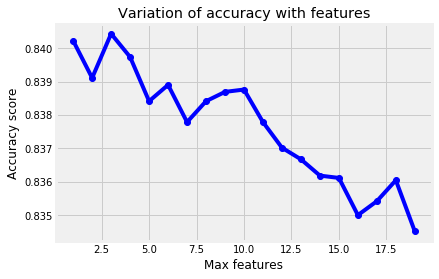

In [57]:
#modifying max_features parameter
num_features = range(1, len(X.columns)+1)
accuracies = []
for n in num_features:
    tot = 0
    for i in range(5):
        rf = RandomForestClassifier(max_features=n)
        rf.fit(x_train, y_train)
        tot += accuracy_score(y_test, rf.predict(x_test))
    accuracies.append(tot/5)
plt.ylabel('Accuracy score')
plt.xlabel('Max features')
plt.title('Variation of accuracy with features')
plt.plot(num_features, accuracies, 'b-', marker='o')
plt.show()

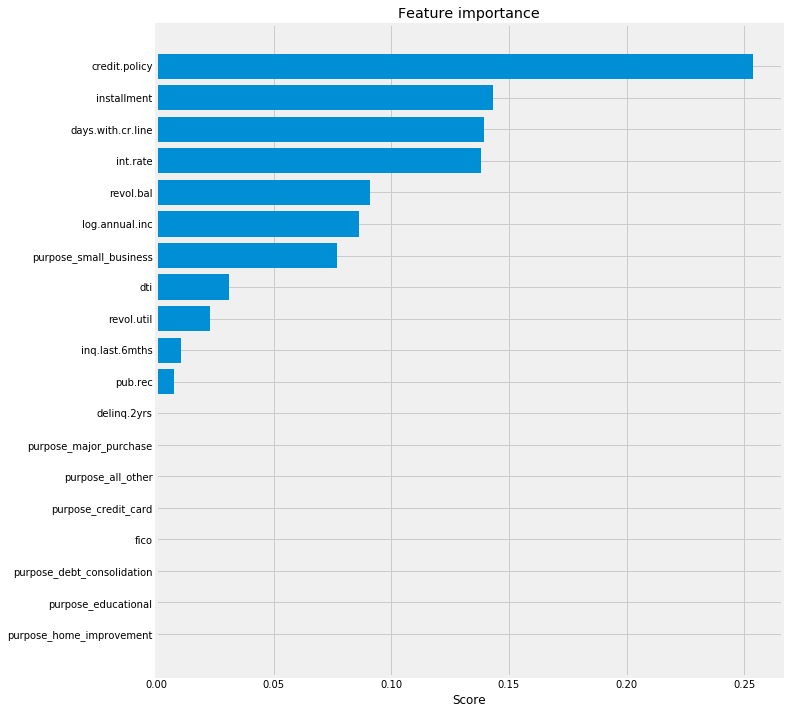

In [72]:
#plot the importance of each feature
feature_imp = model.feature_importances_
sorted_idx = np.argsort(feature_imp)
pos = np.arange(sorted_idx.shape[0]) + .5

plt.figure(figsize=(10,12))
plt.barh(pos, feature_imp[sorted_idx], align='center')
plt.yticks(pos, x_train.columns[sorted_idx])
plt.xlabel('Score')
plt.title('Feature importance')
plt.show()

In [73]:
#let's compare the performance of our 3 models
print("Decision Trees:\tAccuracy, Training Set \t: {:.2%}".format(acc_trees_training))
print("Decision Trees:\tAccuracy, Testing Set \t: {:.2%}".format(acc_trees_testing))

print("\nBagging: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_bagging_training))
print("Bagging: \tAccuracy, Testing Set \t: {:0.2f}%".format( acc_bagging_testing))

print("\nRandom Forest: \tAccuracy, Training Set \t: {:0.2f}%".format(acc_rf_training))
print("Random Forest: \tAccuracy, Testing Set \t: {:0.2f}%".format(acc_rf_testing))

Decision Trees:	Accuracy, Training Set 	: 84.02%
Decision Trees:	Accuracy, Testing Set 	: 83.86%

Bagging: 	Accuracy, Training Set 	: 84.02%
Bagging: 	Accuracy, Testing Set 	: 83.99%

Random Forest: 	Accuracy, Training Set 	: 83.99%
Random Forest: 	Accuracy, Testing Set 	: 83.99%
